# Explore SDSS Stripe 82 RR Lyrae catalog with period-folding

This short example notebook demonstrates how to use TAPE to explore the SDSS Stripe 82 RR Lyrae catalog. We will use a Lomb–Scargle periodogram to extract periods from r-band light curves and select the RR Lyrae star with the most confident period determination. Then, we will plot the period-folded light curve for this RR Lyrae star.

In [1]:
import matplotlib.pyplot as plt
from light_curve import Periodogram
from tape import Ensemble

In [2]:
# Load SDSS Stripe 82 RR Lyrae catalog
ens = Ensemble(client=False).from_dataset('s82_rrlyrae')

/Users/dbranton/lincc/timeseries/tape/src/tape/ensemble.py:1816: UserWarning: Divisions are not known, syncing using a non-lazy method.
  warnings.warn("Divisions are not known, syncing using a non-lazy method.")
/Users/dbranton/lincc/timeseries/tape/src/tape/ensemble.py:1838: UserWarning: Divisions are not known, syncing using a non-lazy method.
  warnings.warn("Divisions are not known, syncing using a non-lazy method.")
/Users/dbranton/lincc/timeseries/tape/src/tape/ensemble.py:1366: UserWarning: Divisions for object are not set, certain downstream dask operations may fail as a result. We recommend setting the `sort` or `sorted` flags when loading data to establish division information.
  warnings.warn(
/Users/dbranton/lincc/timeseries/tape/src/tape/ensemble.py:1366: UserWarning: Divisions for source are not set, certain downstream dask operations may fail as a result. We recommend setting the `sort` or `sorted` flags when loading data to establish division information.
  warnings.wa

In [4]:
%%time

# Filter out invalid detections, "flux" denotes magnitude column
ens = ens.query("10 < flux < 25", table="source")

# Find periods using Lomb-Scargle periodogram
periodogram = Periodogram(peaks=1, nyquist=0.1, max_freq_factor=10, fast=False)

# Use r band only
df = ens.batch(periodogram, band_to_calc='r').compute()
display(df)

# Find RR Lyr with the most confient period
id = df.index[df['period_s_to_n_0'].argmax()]
period = df['period_0'].loc[id]

In Batch
EnsembleFrame
Using generated label, result_2, for a batch result.
True


/Users/dbranton/lincc/timeseries/tape/src/tape/ensemble.py:1838: UserWarning: Divisions are not known, syncing using a non-lazy method.
  warnings.warn("Divisions are not known, syncing using a non-lazy method.")


,period_0,period_s_to_n_0
#id,,
4099,0.641751,19.061786
13350,0.547983,18.542068
15927,0.612275,17.760715
20406,0.631858,18.430296
21992,0.625867,20.105611
...,...,...
4956681,0.499531,14.800598
4983075,0.646707,21.350409
4984662,0.636876,19.130252


CPU times: user 7.21 s, sys: 76.3 ms, total: 7.29 s
Wall time: 7.3 s


Text(0, 0.5, 'Magnitude')

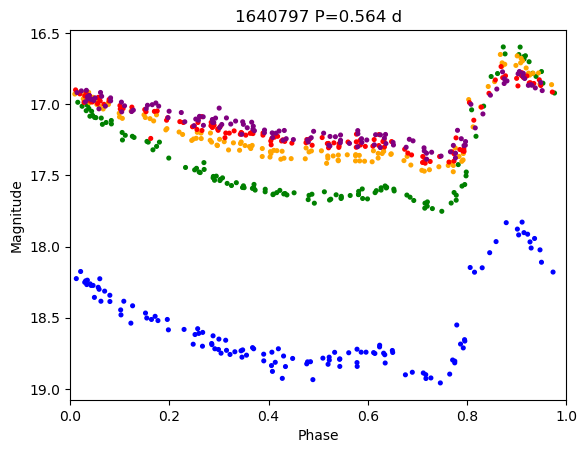

In [5]:
# Plot folded light curve
ts = ens.to_timeseries(id)
COLORS = {'u': 'blue', 'g': 'green', 'r': 'orange', 'i': 'red', 'z': 'purple'}
color = [COLORS[band] for band in ts.band]
plt.title(f'{id} P={period:.3f} d')
plt.gca().invert_yaxis()
plt.scatter(ts.time % period / period, ts.flux, c=color, s=7)
plt.xlim([0, 1])
plt.xlabel('Phase')
plt.ylabel('Magnitude')